Given a matrix and a target, return the number of non-empty submatrices that sum to target.

A submatrix x1, y1, x2, y2 is the set of all cells matrix[x][y] with x1 <= x <= x2 and y1 <= y <= y2.

Two submatrices (x1, y1, x2, y2) and (x1', y1', x2', y2') are different if they have some coordinate that is different: for example, if x1 != x1'.

 

Example 1:
    
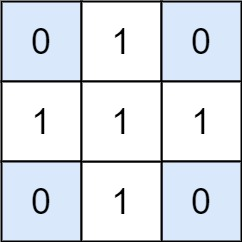

Input: matrix = [[0,1,0],[1,1,1],[0,1,0]], target = 0
Output: 4
Explanation: The four 1x1 submatrices that only contain 0.

Example 2:

Input: matrix = [[1,-1],[-1,1]], target = 0
Output: 5
Explanation: The two 1x2 submatrices, plus the two 2x1 submatrices, plus the 2x2 submatrix.

Example 3:

Input: matrix = [[904]], target = 0
Output: 0

 

Constraints:

    1 <= matrix.length <= 100
    1 <= matrix[0].length <= 100
    -1000 <= matrix[i] <= 1000
    -10^8 <= target <= 10^8


In [35]:
from typing import List
from collections import defaultdict

class Solution:
    def numSubmatrixSumTarget(self, matrix: List[List[int]], target: int) -> int:
        prefix_sum = defaultdict(int)
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                prefix_sum[i, j] = prefix_sum[i - 1, j] + prefix_sum[i, j - 1] - prefix_sum[i - 1, j - 1] + matrix[i][j]
        
        counter = 0
        for i in range(len(matrix)):
            for k in range(-1, i):
                counts = defaultdict(int)
                for j in range(-1, len(matrix[0])):
                    delta = prefix_sum[i, j] - prefix_sum[k, j]
                    counter += counts[delta - target]
                    counts[delta] += 1
        return counter

In [36]:
s = Solution()
s.numSubmatrixSumTarget([[0,1,0],[1,1,1],[0,1,0]], 0)

4